# Hacks Week 25
> Libraries
- toc: true
- comments: true
- categories: [csp, jupyter]
- permalink: /csp/Week25hacks
- tags: [python]
- comments: true

# Lossy Image
![image](https://media.istockphoto.com/id/1129473522/photo/colorful-panoramic-mountain-view-at-sunrise.jpg?b=1&s=170667a&w=0&k=20&c=t3cYkOCQJNIm_pmcxkZgJH7A7uWD4flhlAMp5dLEIdQ=)

- Lossy compression is a technique that permanently discards some of the original image data, resulting in reduced image quality. JPEG images are an example of lossy compression, where the degree of compression determines the amount of data that is discarded. Higher compression levels result in greater loss of data and lower image quality.

# Lossless Image
![Dybala](https://www.pngmart.com/files/22/Paulo-Dybala-PNG-Isolated-Photos.png)
- When you resize a PNG image, it maintains its pixel quality as it is a lossless format.
Lossless compression techniques identify and represent patterns within image data in a more efficient manner. Consequently, the file size can be greatly reduced without compromising any information.

-- original image --



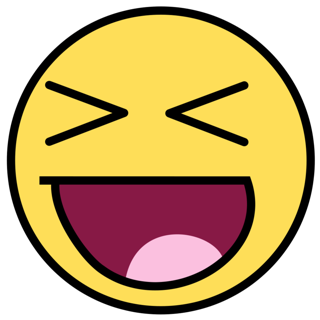

--- grey image ----



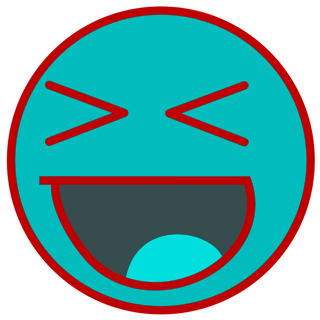

-- original image --



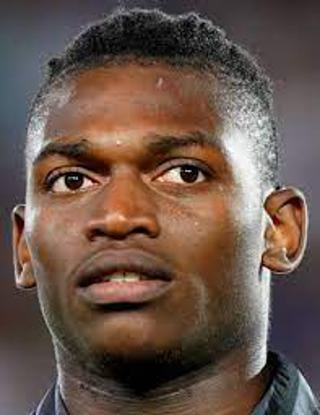

--- grey image ----



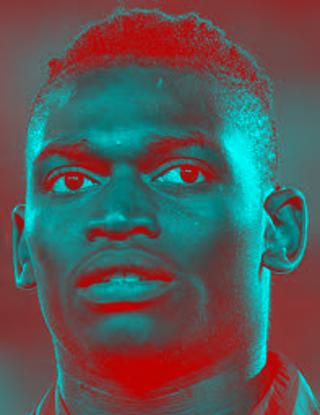

In [15]:
from IPython.display import HTML, display
from pathlib import Path  
from PIL import Image as pilImage 
from io import BytesIO
import base64
import numpy as np
def image_to_base64(img, format):
    with BytesIO() as buffer:
        img.save(buffer, format)
        return base64.b64encode(buffer.getvalue()).decode()

def scale_image(img):
    baseWidth = 320
    scalePercent = (baseWidth/float(img.size[0]))
    scaleHeight = int((float(img.size[1])*float(scalePercent)))
    scale = (baseWidth, scaleHeight)
    return img.resize(scale)

def image_data(path=Path("../images/"), images=None):  
    if images is None:  
        images = [
            {'source': "Internet", 'label': "Green Square", 'file': "Face.png"},
            {'source': "Peter Carolin", 'label': "Clouds Impression", 'file': "Raphael.jpeg"},
        ]
    for image in images:
        
        image['filename'] = path / image['file']  
    return images
def image_management(image):  # path of static images is defaulted        
    # Image open return PIL image object
    img = pilImage.open(image['filename'])
    
    # Python Image Library operations
    image['format'] = img.format
    image['mode'] = img.mode
    image['size'] = img.size
    # Scale the Image
    img = scale_image(img)
    image['pil'] = img
    image['scaled_size'] = img.size
    # Scaled HTML
    image['html'] = '<img src="data:image/png;base64,%s">' % image_to_base64(image['pil'], image['format'])
    

def image_management_add_html_grey(image):
    img = image['pil']
    format = image['format']
    
    img_data = img.getdata()  
    image['data'] = np.array(img_data)
    image['gray_data'] = [] 

    for pixel in image['data']:
        
        average = (pixel[0] + pixel[1] + pixel[2]) // 3 
        average2 = 190 - (pixel[0]) 
        if len(pixel) > 3:
            image['gray_data'].append((average2, average, average, pixel[3])) 
        else:
            image['gray_data'].append((average2, average, average))
    
    # Average 2 is what changes the color

        
    img.putdata(image['gray_data'])
    image['html_grey'] = '<img src="data:image/png;base64,%s">' % image_to_base64(img, format)



if __name__ == "__main__":

    images = image_data()
    
 
    for image in images:
        image_management(image)
        print("-- original image --")
        display(HTML(image['html'])) 
        
        print("--- grey image ----")
        image_management_add_html_grey(image)
        display(HTML(image['html_grey'])) 
    print()

-- original image --



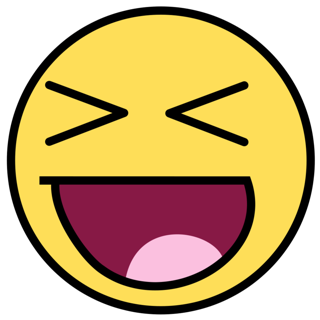

--- grey image ----



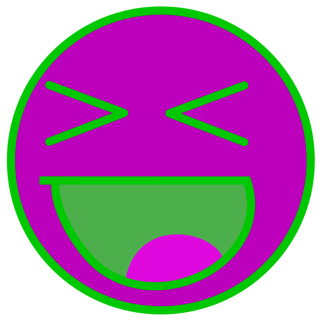

-- original image --



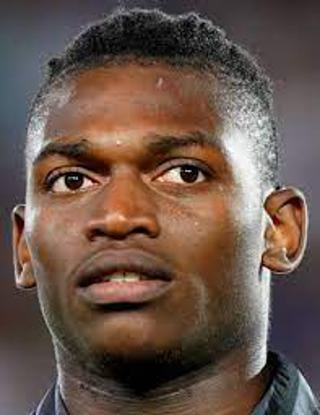

--- grey image ----



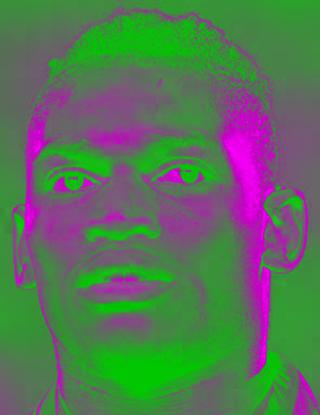

In [19]:
from IPython.display import HTML, display
from pathlib import Path  
from PIL import Image as pilImage 
from io import BytesIO
import base64
import numpy as np
def image_to_base64(img, format):
    with BytesIO() as buffer:
        img.save(buffer, format)
        return base64.b64encode(buffer.getvalue()).decode()

def scale_image(img):
    baseWidth = 320
    scalePercent = (baseWidth/float(img.size[0]))
    scaleHeight = int((float(img.size[1])*float(scalePercent)))
    scale = (baseWidth, scaleHeight)
    return img.resize(scale)

def image_data(path=Path("../images/"), images=None):  
    if images is None:  
        images = [
            {'source': "Internet", 'label': "Green Square", 'file': "Face.png"},
            {'source': "Peter Carolin", 'label': "Clouds Impression", 'file': "Raphael.jpeg"},
        ]
    for image in images:
        
        image['filename'] = path / image['file']  
    return images
def image_management(image):  # path of static images is defaulted        
    # Image open return PIL image object
    img = pilImage.open(image['filename'])
    
    # Python Image Library operations
    image['format'] = img.format
    image['mode'] = img.mode
    image['size'] = img.size
    # Scale the Image
    img = scale_image(img)
    image['pil'] = img
    image['scaled_size'] = img.size
    # Scaled HTML
    image['html'] = '<img src="data:image/png;base64,%s">' % image_to_base64(image['pil'], image['format'])
    

def image_management_add_html_grey(image):
    img = image['pil']
    format = image['format']
    
    img_data = img.getdata()  
    image['data'] = np.array(img_data)
    image['gray_data'] = [] 

    for pixel in image['data']:
        
        average = (pixel[0] + pixel[1] + pixel[2]) // 3 
        average2 = 200 - (pixel[1]) 
        if len(pixel) > 3:
            image['gray_data'].append((average, average2, average, pixel[3])) 
        else:
            image['gray_data'].append((average, average2, average))

        
    img.putdata(image['gray_data'])
    image['html_grey'] = '<img src="data:image/png;base64,%s">' % image_to_base64(img, format)



if __name__ == "__main__":

    images = image_data()
    
 
    for image in images:
        image_management(image)
        print("-- original image --")
        display(HTML(image['html'])) 
        
        print("--- grey image ----")
        image_management_add_html_grey(image)
        display(HTML(image['html_grey'])) 
    print()

-- original image --



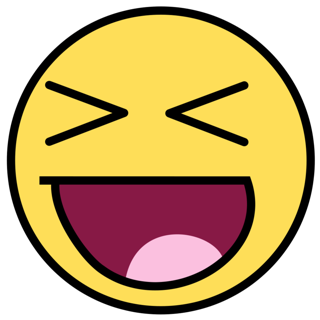

--- grey image ----



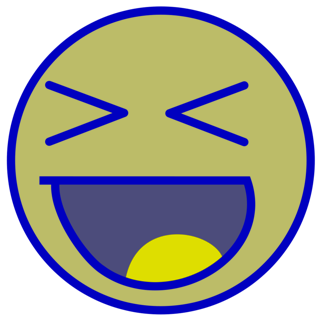

-- original image --



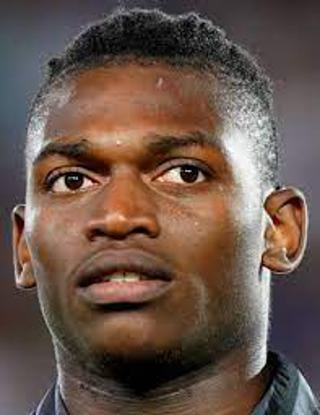

--- grey image ----



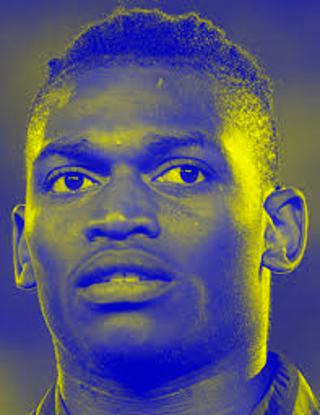

In [20]:
from IPython.display import HTML, display
from pathlib import Path  
from PIL import Image as pilImage 
from io import BytesIO
import base64
import numpy as np
def image_to_base64(img, format):
    with BytesIO() as buffer:
        img.save(buffer, format)
        return base64.b64encode(buffer.getvalue()).decode()

def scale_image(img):
    baseWidth = 320
    scalePercent = (baseWidth/float(img.size[0]))
    scaleHeight = int((float(img.size[1])*float(scalePercent)))
    scale = (baseWidth, scaleHeight)
    return img.resize(scale)

def image_data(path=Path("../images/"), images=None):  
    if images is None:  
        images = [
            {'source': "Internet", 'label': "Green Square", 'file': "Face.png"},
            {'source': "Peter Carolin", 'label': "Clouds Impression", 'file': "Raphael.jpeg"},
        ]
    for image in images:
        
        image['filename'] = path / image['file']  
    return images
def image_management(image):  # path of static images is defaulted        
    # Image open return PIL image object
    img = pilImage.open(image['filename'])
    
    # Python Image Library operations
    image['format'] = img.format
    image['mode'] = img.mode
    image['size'] = img.size
    # Scale the Image
    img = scale_image(img)
    image['pil'] = img
    image['scaled_size'] = img.size
    # Scaled HTML
    image['html'] = '<img src="data:image/png;base64,%s">' % image_to_base64(image['pil'], image['format'])
    

def image_management_add_html_grey(image):
    img = image['pil']
    format = image['format']
    
    img_data = img.getdata()  
    image['data'] = np.array(img_data)
    image['gray_data'] = [] 

    for pixel in image['data']:
        
        average = (pixel[0] + pixel[1] + pixel[2]) // 3 
        average2 = 192 - (pixel[2]) 
        if len(pixel) > 3:
            image['gray_data'].append((average, average, average2, pixel[3])) 
        else:
            image['gray_data'].append((average, average, average2))

        
    img.putdata(image['gray_data'])
    image['html_grey'] = '<img src="data:image/png;base64,%s">' % image_to_base64(img, format)



if __name__ == "__main__":

    images = image_data()
    
 
    for image in images:
        image_management(image)
        print("-- original image --")
        display(HTML(image['html'])) 
        
        print("--- grey image ----")
        image_management_add_html_grey(image)
        display(HTML(image['html_grey'])) 
    print()

In [ ]:
from PIL import Image, ImageFilter

# Load image
image = Image.open("Face.png")

# Apply Gaussian blur filter
blurred_image = image.filter(ImageFilter.GaussianBlur(radius=10))

# Display blurred image
blurred_image.save("blurred_image.jpg")